In [ ]:
!pip install opencv-python # OpenCV 라이브러리 설치

import cv2 # OpenCV 라이브러리 import
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


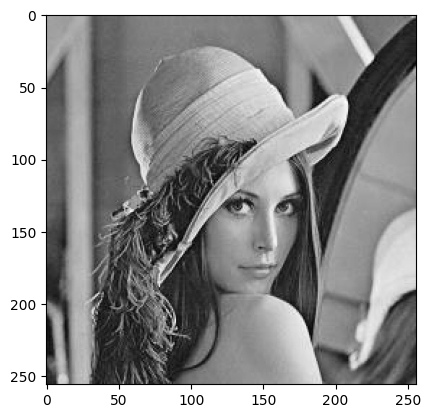

In [ ]:
#img = cv2.imread('/content/gdrive/My Drive/Images/milkdrop.bmp')
img = cv2.imread('/content/gdrive/My Drive/Images/lena256.jpg') # 이미지 파일 읽기
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 이미지를 RGB 이미지로 변환

gimg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg.shape)
plt.imshow(gimg,cmap='gray')

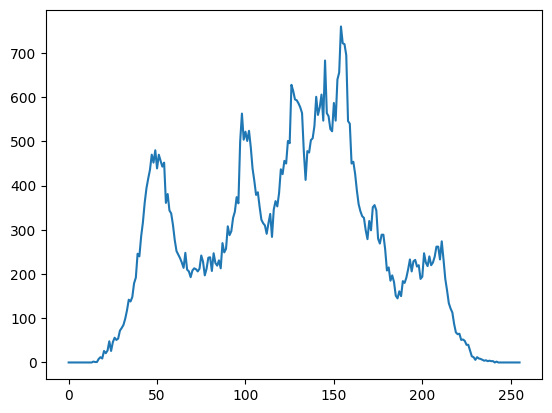

In [ ]:
hist = cv2.calcHist([gimg] , [0],None , [256], [0,256])
plt.plot(hist)

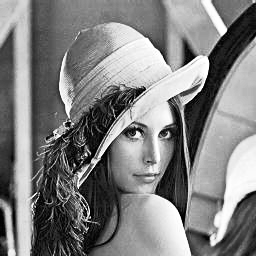

In [ ]:
g0ut = cv2.equalizeHist(gimg)
cv2_imshow(g0ut)

(256, 1)


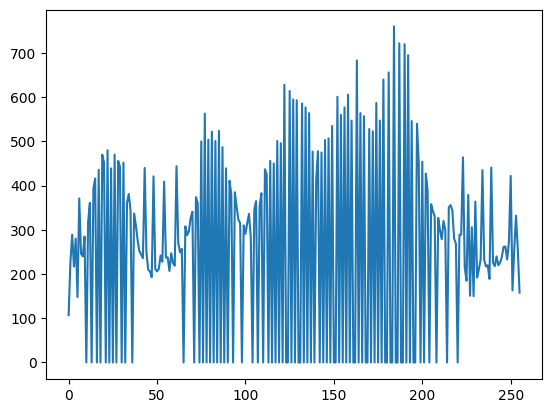

In [ ]:
hist = cv2.calcHist([g0ut] , [0],None , [256], [0,256])
plt.plot(hist)
print(hist.shape)

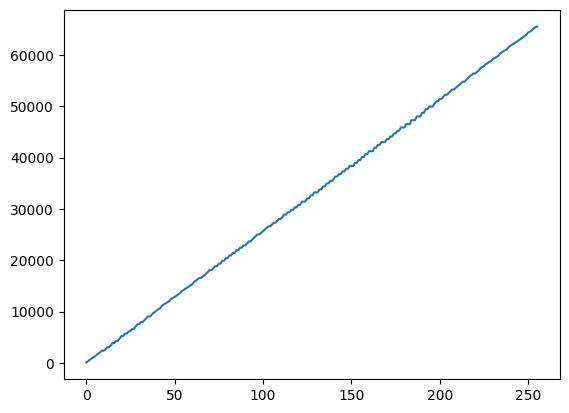

In [ ]:
cumulHist = hist.copy()

for i in range(1, 256):
  cumulHist[i] = cumulHist[i-1] + hist[i]

plt.plot(cumulHist)

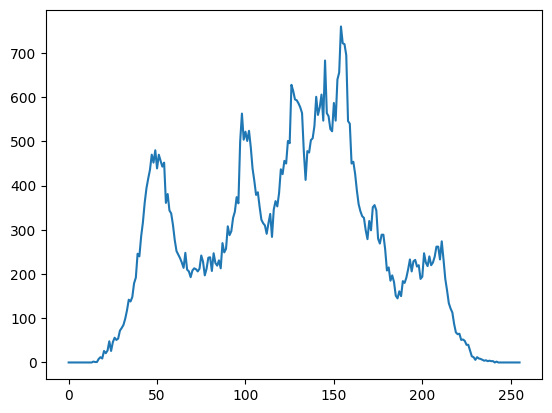

In [ ]:
hist = cv2.calcHist([gimg] , [0],None , [256], [0,256])
plt.plot(hist)

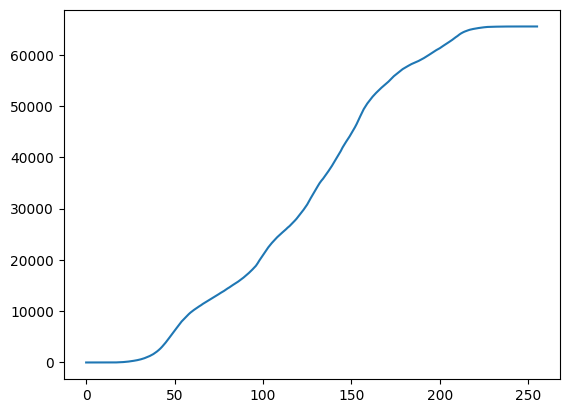

In [ ]:
cumulHist = hist.copy()

for i in range(1, 256):
  cumulHist[i] = cumulHist[i-1] + hist[i]

plt.plot(cumulHist)

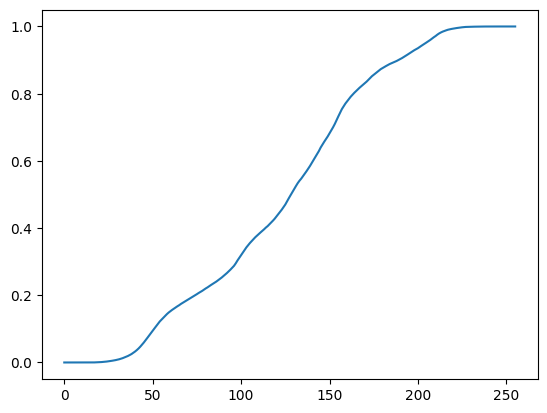

In [ ]:
equalHist = cumulHist.copy()
num0fpixels = np.int32(gimg.shape[0]*gimg.shape[1])
equalHist = equalHist/num0fpixels

plt.plot(equalHist)

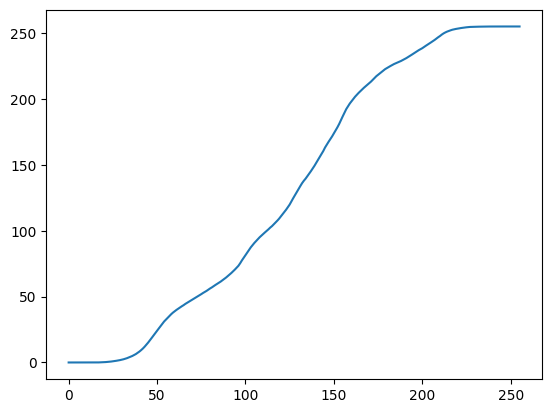

In [ ]:
equalHist = equalHist *255

plt.plot(equalHist)

<ipython-input-14-5b54e21f6f5a>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  g0ut[h,w] = equalHist[gimg[h,w]]


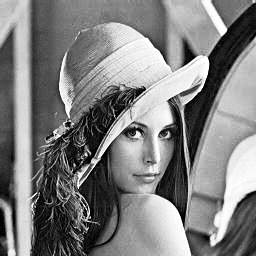

In [ ]:
g0ut = gimg.copy()

for h in range(gimg.shape[0]):
  for w in range(gimg.shape[1]):
    g0ut[h,w] = equalHist[gimg[h,w]]

cv2_imshow(g0ut)

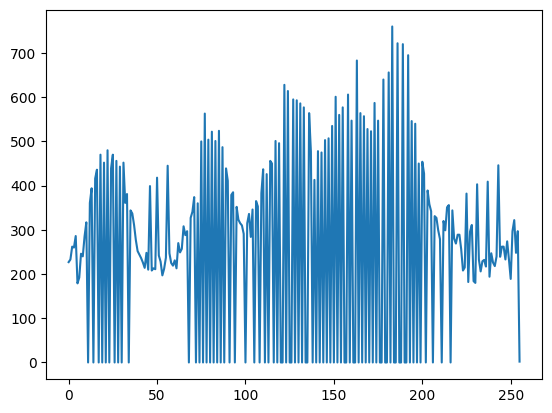

In [ ]:
hist = cv2.calcHist([g0ut] , [0],None , [256], [0,256])
plt.plot(hist)

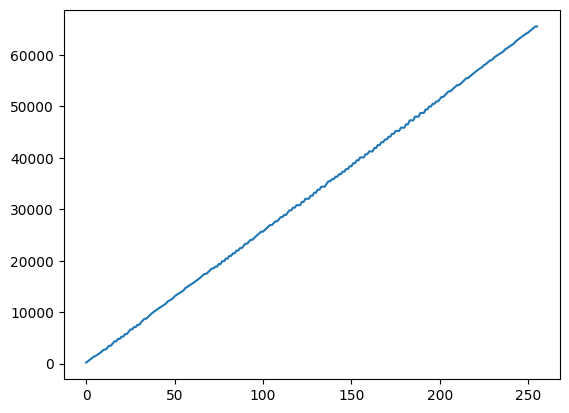

In [ ]:
cumulHist = hist.copy()

for i in range(1, 256):
  cumulHist[i] = cumulHist[i-1] + hist[i]

plt.plot(cumulHist)